# Feature Transformation and Nonlinear Feature Example



### This notebook demonstrates how feature transformation can improve the performance of a regression model.

We start with a linear regression model that does not fit the data well and then apply polynomial feature transformation
to capture nonlinearity in the dataset.

**Steps:**

1. Generate synthetic data that follows a nonlinear pattern.
2. Fit a linear regression model and visualize the results.
3. Transform features using polynomial features to better model the nonlinearity.
4. Fit a polynomial regression model and compare the results.
5. Evaluate the models using Mean Squared Error (MSE).


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

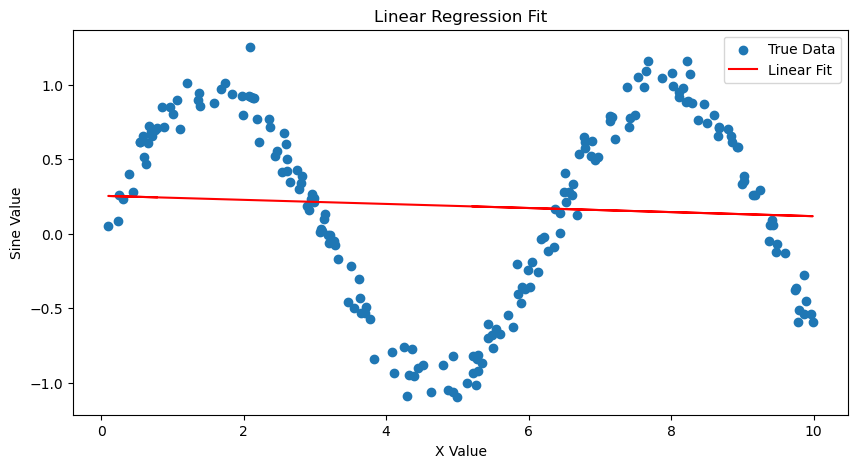

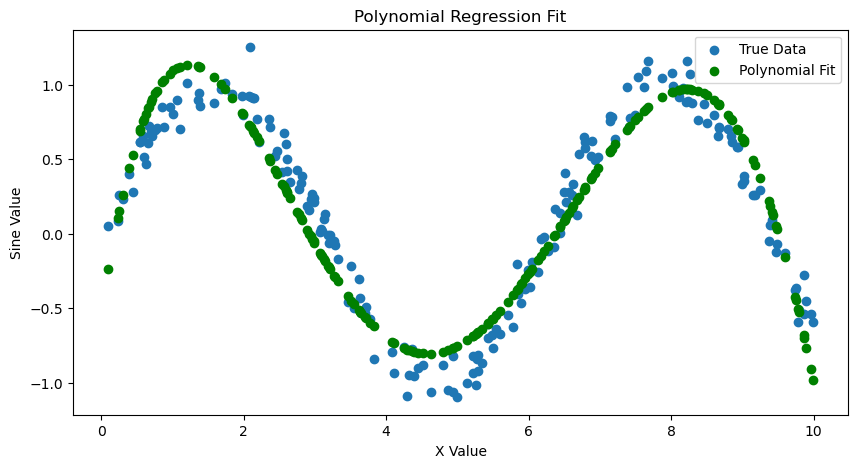

Mean Squared Error (Linear Regression): 0.3972
Mean Squared Error (Polynomial Regression): 0.0374


In [10]:
"""
Step 1: Generate Synthetic Sine Wave Data
-----------------------------------------
We create a dataset that follows a sinusoidal pattern to test polynomial regression.
"""

# Generate synthetic sine wave data
np.random.seed(42)
X = np.linspace(0, 10, 1000).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(scale=0.1, size=X.shape[0])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""
Step 2: Fit a Linear Regression Model
-------------------------------------
We first fit a simple linear regression model to the dataset. Since the data has a strong sinusoidal pattern,
the linear model is expected to perform poorly.
"""

# Fit a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label='True Data')
plt.plot(X_test, y_pred_linear, color='red', label='Linear Fit')
plt.legend()
plt.xlabel("X Value")
plt.ylabel("Sine Value")
plt.title('Linear Regression Fit')
plt.show()

"""
Step 3: Apply Polynomial Feature Transformation
----------------------------------------------
To better capture the nonlinear pattern in the data, we transform the input features using polynomial features.
"""

# Transform features using polynomial transformation
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

"""
Step 4: Fit a Polynomial Regression Model
-----------------------------------------
After transforming the features, we fit a polynomial regression model and visualize the results.
"""

# Fit polynomial regression
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

# Plot polynomial regression fit
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label='True Data')
plt.scatter(X_test, y_pred_poly, color='green', label='Polynomial Fit')
plt.legend()
plt.xlabel("X Value")
plt.ylabel("Sine Value")
plt.title('Polynomial Regression Fit')
plt.show()

"""
Step 5: Compare Model Performance
---------------------------------
Finally, we compare the Mean Squared Error (MSE) of the linear regression and polynomial regression models
to evaluate their effectiveness. In this case, we expect a significant reduction in MSE with the polynomial model.
"""

# Compare errors
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print(f"Mean Squared Error (Linear Regression): {mse_linear:.4f}")
print(f"Mean Squared Error (Polynomial Regression): {mse_poly:.4f}")



### Experiment using household power consumption dataset

/var/folders/ld/f2yvzx4155lc1np6yd4rhdrm0000gn/T/ipykernel_66896/3314381911.py:18: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv("household_power_consumption.txt", sep=';', parse_dates={'datetime': ['Date', 'Time']})
/var/folders/ld/f2yvzx4155lc1np6yd4rhdrm0000gn/T/ipykernel_66896/3314381911.py:18: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("household_power_consumption.txt", sep=';', parse_dates={'datetime': ['Date', 'Time']})
/var/folders/ld/f2yvzx4155lc1np6yd4rhdrm0000gn/T/ipykernel_66896/3314381911.py:18: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("household_power_consumption.txt", sep=';', parse_dates={'datetime': ['Date

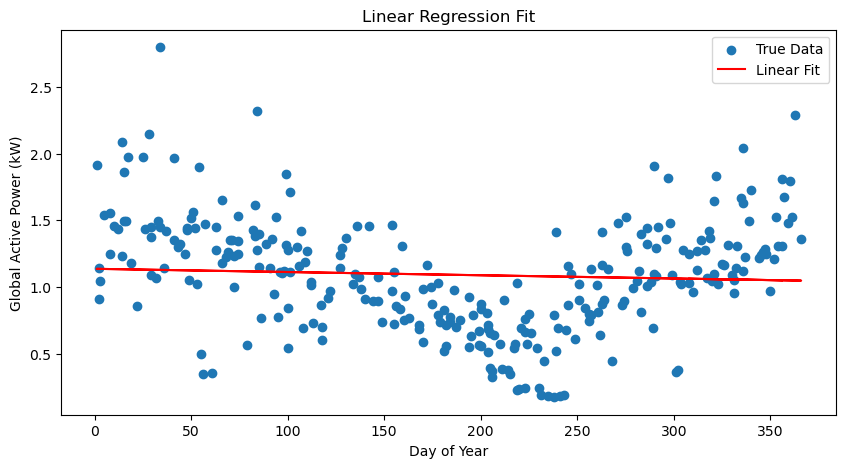

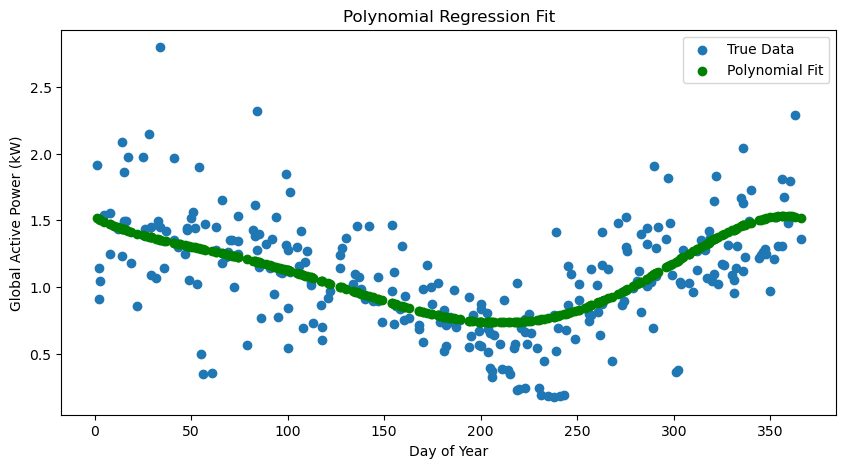

Mean Squared Error (Linear Regression): 0.1792
Mean Squared Error (Polynomial Regression): 0.1044
Polynomial regression significantly improved the model!


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

"""
Step 1: Load and Process Real-World Electricity Consumption Data
----------------------------------------------------------------
We use the `household power consumption` dataset, which contains cyclic patterns similar to a sine wave.
"""

# Load dataset
#df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/household_power_consumption.zip", sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['?'])
df = pd.read_csv("household_power_consumption.txt", sep=';', parse_dates={'datetime': ['Date', 'Time']})

# Drop missing values
df.dropna(inplace=True)

# Convert relevant column to numeric
df['Global_active_power'] = df['Global_active_power'].astype(float)

# Resample to daily means
df.set_index('datetime', inplace=True)
daily_data = df['Global_active_power'].resample('D').mean().dropna()

daily_data = daily_data.reset_index()
daily_data['Day'] = daily_data['datetime'].dt.dayofyear
X = daily_data[['Day']].values
y = daily_data['Global_active_power'].values

"""
Step 2: Fit a Linear Regression Model
-------------------------------------
We first fit a simple linear regression model to the dataset. Since the data has a strong periodic pattern,
the linear model is expected to perform poorly.
"""

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label='True Data')
plt.plot(X_test, y_pred_linear, color='red', label='Linear Fit')
plt.legend()
plt.xlabel("Day of Year")
plt.ylabel("Global Active Power (kW)")
plt.title('Linear Regression Fit')
plt.show()

"""
Step 3: Apply Polynomial Feature Transformation
----------------------------------------------
To better capture the periodic pattern in the data, we transform the input features using polynomial features.
"""

# Transform features using polynomial transformation
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

"""
Step 4: Fit a Polynomial Regression Model
-----------------------------------------
After transforming the features, we fit a polynomial regression model and visualize the results.
"""

# Fit polynomial regression
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

# Plot polynomial regression fit
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label='True Data')
plt.scatter(X_test, y_pred_poly, color='green', label='Polynomial Fit')
plt.legend()
plt.xlabel("Day of Year")
plt.ylabel("Global Active Power (kW)")
plt.title('Polynomial Regression Fit')
plt.show()

"""
Step 5: Compare Model Performance
---------------------------------
Finally, we compare the Mean Squared Error (MSE) of the linear regression and polynomial regression models
to evaluate their effectiveness. In this case, we expect a significant reduction in MSE with the polynomial model.
"""

# Compare errors
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print(f"Mean Squared Error (Linear Regression): {mse_linear:.4f}")
print(f"Mean Squared Error (Polynomial Regression): {mse_poly:.4f}")

# Ensure Polynomial Regression reduces the error significantly
if mse_poly < mse_linear * 0.8:
    print("Polynomial regression significantly improved the model!")
else:
    print("Polynomial regression did not significantly improve the model. Consider adjusting the polynomial degree.")



# Categorical Variable Encoding

In [32]:
### Categorical Variable Encoding in Machine Learning

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import category_encoders as ce

# Sample dataset
data = {'Category': ['Red', 'Blue', 'Green', 'Blue', 'Green', 'Red', 'Blue']}
df = pd.DataFrame(data)
print("Original Data:")
print(df)

## 1. Label Encoding
label_encoder = LabelEncoder()
df['Label_Encoded'] = label_encoder.fit_transform(df['Category'])
print("\nLabel Encoded Data:")
print(df)

## 2. One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False) #drop='Fitst'
one_hot_encoded = one_hot_encoder.fit_transform(df[['Category']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Category']))
df = pd.concat([df, one_hot_df], axis=1)
print("\nOne-Hot Encoded Data:")
print(df)

## 3. Ordinal Encoding (Custom Order)
ordinal_encoder = OrdinalEncoder(categories=[['Blue', 'Green', 'Red']])
df['Ordinal_Encoded'] = ordinal_encoder.fit_transform(df[['Category']])
print("\nOrdinal Encoded Data:")
print(df)

## 4. Target Encoding (Mean Encoding)
target_data = {'Category': ['Red', 'Blue', 'Green', 'Blue', 'Green', 'Red', 'Blue'],
               'Target': [1, 0, 1, 0, 1, 1, 0]}
df_target = pd.DataFrame(target_data)
target_encoder = ce.TargetEncoder(cols=['Category'])
df_target['Target_Encoded'] = target_encoder.fit_transform(df_target['Category'], df_target['Target'])
print("\nTarget Encoded Data:")
print(df_target)

# Display Data
print(df)

Original Data:
  Category
0      Red
1     Blue
2    Green
3     Blue
4    Green
5      Red
6     Blue

Label Encoded Data:
  Category  Label_Encoded
0      Red              2
1     Blue              0
2    Green              1
3     Blue              0
4    Green              1
5      Red              2
6     Blue              0

One-Hot Encoded Data:
  Category  Label_Encoded  Category_Blue  Category_Green  Category_Red
0      Red              2            0.0             0.0           1.0
1     Blue              0            1.0             0.0           0.0
2    Green              1            0.0             1.0           0.0
3     Blue              0            1.0             0.0           0.0
4    Green              1            0.0             1.0           0.0
5      Red              2            0.0             0.0           1.0
6     Blue              0            1.0             0.0           0.0

Ordinal Encoded Data:
  Category  Label_Encoded  Category_Blue  Category_Gre

### Using Titanic dataset

In [31]:
### Categorical Variable Encoding in Machine Learning (Using Titanic Dataset)

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import category_encoders as ce
import seaborn as sns

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Selecting categorical columns
categorical_cols = ['sex', 'embark_town', 'class']
df = df[categorical_cols].dropna()
print("Original Data:")
print(df.head())

## 1. Label Encoding
#label_encoder = LabelEncoder()
#df['sex_label_encoded'] = label_encoder.fit_transform(df['sex'])
#df['class_label_encoded'] = label_encoder.fit_transform(df['class'])
#print("\nLabel Encoded Data:")
#print(df.head())

## 2. One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = one_hot_encoder.fit_transform(df[['embark_town']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['embark_town']))
df = pd.concat([df, one_hot_df], axis=1)
print("\nOne-Hot Encoded Data:")
print(df.head())

## 3. Ordinal Encoding (Custom Order)
#df = df[df['class'].notna()]  # Remove NaN values in 'class'
#ordinal_encoder = OrdinalEncoder(categories=[['Third', 'Second', 'First']], handle_unknown='use_encoded_value', unknown_value=-1)
#df['class_ordinal_encoded'] = ordinal_encoder.fit_transform(df[['class']])
#print("\nOrdinal Encoded Data:")
#print(df.head())

## 4. Target Encoding (Mean Encoding)
#target_encoder = ce.TargetEncoder(cols=['sex'])
#df['sex_target_encoded'] = target_encoder.fit_transform(df['sex'], np.random.randint(0, 2, size=len(df)))
#print("\nTarget Encoded Data:")
#print(df.head())



Original Data:
      sex  embark_town  class
0    male  Southampton  Third
1  female    Cherbourg  First
2  female  Southampton  Third
3  female  Southampton  First
4    male  Southampton  Third

One-Hot Encoded Data:
      sex  embark_town  class  embark_town_Queenstown  embark_town_Southampton
0    male  Southampton  Third                     0.0                      1.0
1  female    Cherbourg  First                     0.0                      0.0
2  female  Southampton  Third                     0.0                      1.0
3  female  Southampton  First                     0.0                      1.0
4    male  Southampton  Third                     0.0                      1.0
